<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/Group_9_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import cv2
import time
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, Input, Dense, Activation, MaxPooling2D, Flatten, Dropout,GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# For GPU users

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
print(f'GPU: {physical_devices}')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

GPU: []


# Dataset from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Data Folder Path

In [ ]:
train_badam_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/train/Badam"
train_chola_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/train/Chola"
test_badam_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/test/Badam"
test_chola_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/test/Chola"
val_badam_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/validation/Badam"
val_chola_dir = "/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/validation/Chola"

# Dataset Load

In [ ]:
IMAGE_WIDTH, IMAGE_HEIGHT = 32, 32

# train_badam_dir = "./Latest Dataset/train/Badam/"
# train_chola_dir = "./Latest Dataset/train/Chola/"
# test_badam_dir = "./Latest Dataset/test/Badam/"
# test_chola_dir = "./Latest Dataset/test/Chola/"
# val_badam_dir = "./Latest Dataset/validation/Badam/"
# val_chola_dir = "./Latest Dataset/validation/Chola/"


def load_images(directory):
    images = []
    labels = []
    idx = 1
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg')):
            print(f"\rimage no: {idx}", end='')
            idx = idx + 1
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
            if 'Badam' in directory:
                labels.append(0)
            elif 'Chola' in directory:
                labels.append(1)
    return np.array(images), np.array(labels)


print("Loading train images...")
train_badam_images, train_badam_labels = load_images(train_badam_dir)
print()
train_chola_images, train_chola_labels = load_images(train_chola_dir)
print("\nLoading test images...")
test_badam_images, test_badam_labels = load_images(test_badam_dir)
print()
test_chola_images, test_chola_labels = load_images(test_chola_dir)
print("\nLoading validation images...")
val_badam_images, val_badam_labels = load_images(val_badam_dir)
print()
val_chola_images, val_chola_labels = load_images(val_chola_dir)

train_images = np.concatenate((train_badam_images, train_chola_images))
train_labels = np.concatenate((train_badam_labels, train_chola_labels))
test_images = np.concatenate((test_badam_images, test_chola_images))
test_labels = np.concatenate((test_badam_labels, test_chola_labels))
val_images = np.concatenate((val_badam_images, val_chola_images))
val_labels = np.concatenate((val_badam_labels, val_chola_labels))

train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images / 255.0

print(f'\nShape of train_badam_images: {train_images.shape}')
print(f'Shape of test_badam_images: {train_labels.shape}')
print(f'Shape of test_badam_images: {test_images.shape}')
print(f'Shape of test_badam_images: {test_labels.shape}')
print(f'Shape of val_chola_images: {val_images.shape}')
print(f'Shape of val_chola_images: {val_labels.shape}')

Loading train images...
image no: 551
image no: 551
Loading test images...
image no: 110
image no: 110
Loading validation images...
image no: 55
image no: 55
Shape of train_badam_images: (1102, 32, 32, 3)
Shape of test_badam_images: (1102,)
Shape of test_badam_images: (220, 32, 32, 3)
Shape of test_badam_images: (220,)
Shape of val_chola_images: (110, 32, 32, 3)
Shape of val_chola_images: (110,)


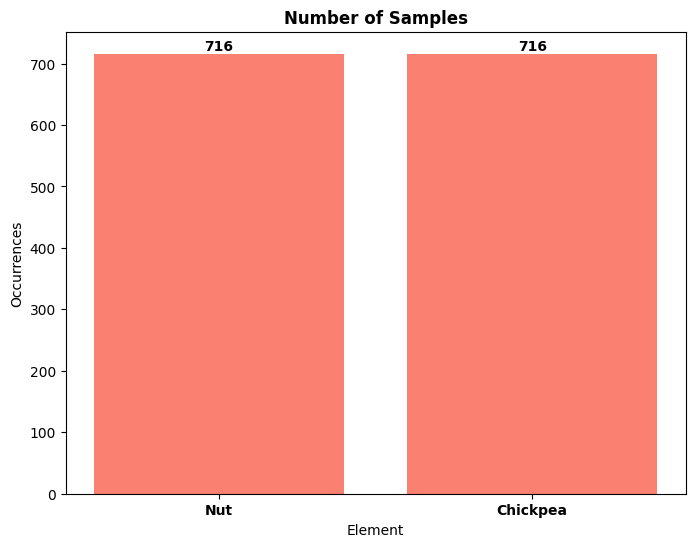

In [ ]:
# Concatenate labels from all sets
labels = np.concatenate((train_labels, test_labels, val_labels))

# Count occurrences of each label
values, counts = np.unique(labels, return_counts=True)

# Create bar plot
plt.figure(figsize=(8, 6))  # Set figure size
bars = plt.bar(values, counts, color='salmon')
plt.xlabel('Element')
plt.ylabel('Occurrences')
plt.title('Number of Samples', fontweight='bold')  # Bold title
for i, count in enumerate(counts):
    plt.text(values[i], count, str(count), ha='center', va='bottom', weight='bold')

plt.xticks(values, ['Nut', 'Chickpea'], weight='bold')  # Bold x-axis tick labels

# Save the figure
#plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/total_samples.png')

plt.show()


#Number of Images in Different Sets

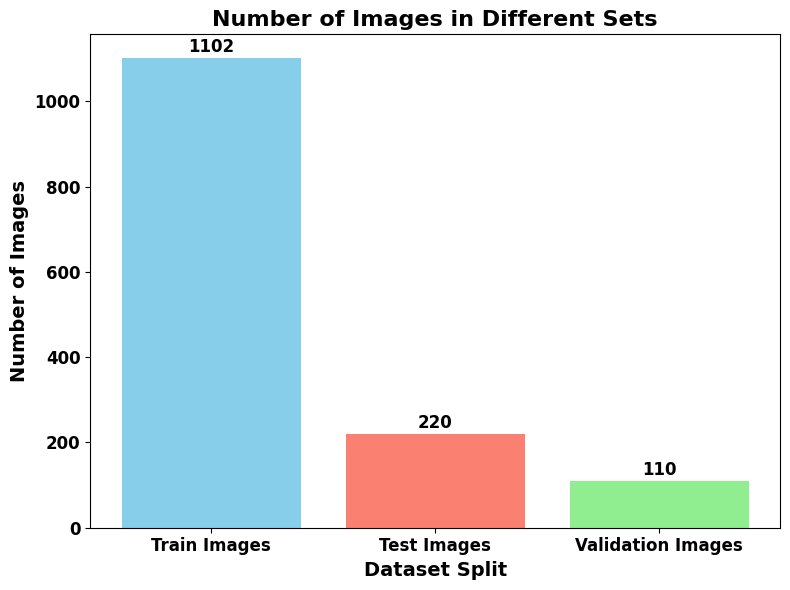

In [ ]:
# Shapes of the image arrays
train_images_shape = (train_images.shape[0],)
test_images_shape = (test_images.shape[0],)
val_images_shape = (val_images.shape[0],)

# Create labels and counts
labels = ['Train Images', 'Test Images', 'Validation Images']
counts = [train_images_shape[0], test_images_shape[0], val_images_shape[0]]

# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen']

# Plotting the bar chart with different colors and bold font
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=colors)
plt.xlabel('Dataset Split', fontsize=14, weight='bold')  # Bold and larger x-axis label
plt.ylabel('Number of Images', fontsize=14, weight='bold')  # Bold and larger y-axis label
plt.title('Number of Images in Different Sets', fontsize=16, weight='bold')  # Bold and larger title
plt.xticks(range(len(labels)), labels, ha='center', fontsize=12, weight='bold')  # Bold and larger x-axis tick labels
plt.yticks(fontsize=12, weight='bold')  # Bold and larger y-axis tick labels
plt.tight_layout()

# Add count values on top of bars with bold and larger font
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, str(count),
             ha='center', va='bottom', fontsize=12, weight='bold')
# plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/samples_split_in_sets.png')

plt.show()


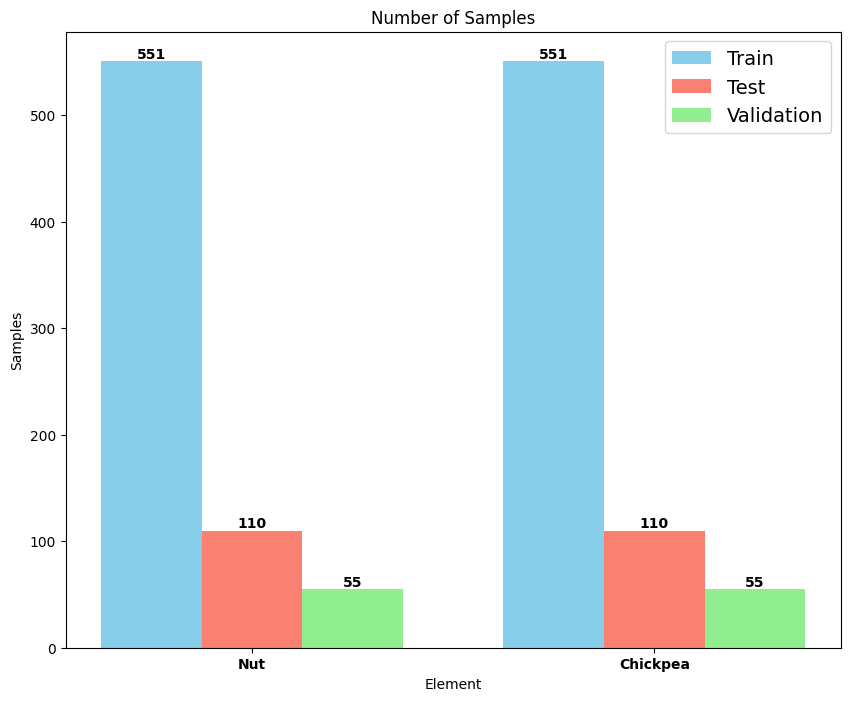

In [ ]:
# Calculate counts for each label in train, test, and val sets
train_values, train_counts = np.unique(train_labels, return_counts=True)
test_values, test_counts = np.unique(test_labels, return_counts=True)
val_values, val_counts = np.unique(val_labels, return_counts=True)

# Set the width of each individual bar
bar_width = 0.25

# Set the x positions for the train, test, and val bars
train_x = np.arange(len(train_values)) - bar_width
test_x = np.arange(len(test_values))
val_x = np.arange(len(val_values)) + bar_width

# Set figure size
plt.figure(figsize=(10, 8))

# Plot the train bars and their counts with color skyblue
plt.bar(train_x, train_counts, width=bar_width, label='Train', color='skyblue')
for i, count in enumerate(train_counts):
    plt.text(train_x[i], count, str(count), ha='center', va='bottom',  weight = 'bold')

# Plot the test bars and their counts with color salmon
plt.bar(test_x, test_counts, width=bar_width, label='Test', color='salmon')
for i, count in enumerate(test_counts):
    plt.text(test_x[i], count, str(count), ha='center', va='bottom', weight = 'bold')

# Plot the val bars and their counts with color lightgreen
plt.bar(val_x, val_counts, width=bar_width, label='Validation', color='lightgreen')
for i, count in enumerate(val_counts):
    plt.text(val_x[i], count, str(count), ha='center', va='bottom', weight = 'bold')

plt.xlabel('Element')
plt.ylabel('Samples')
plt.title('Number of Samples')

# Set x-axis ticks and labels
plt.xticks(test_x, ['Nut', 'Chickpea'], weight='bold')

# Add legend
plt.legend(fontsize=14)

# Save the plot
# plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/spillited_samples.png')

# Show the plot
plt.show()


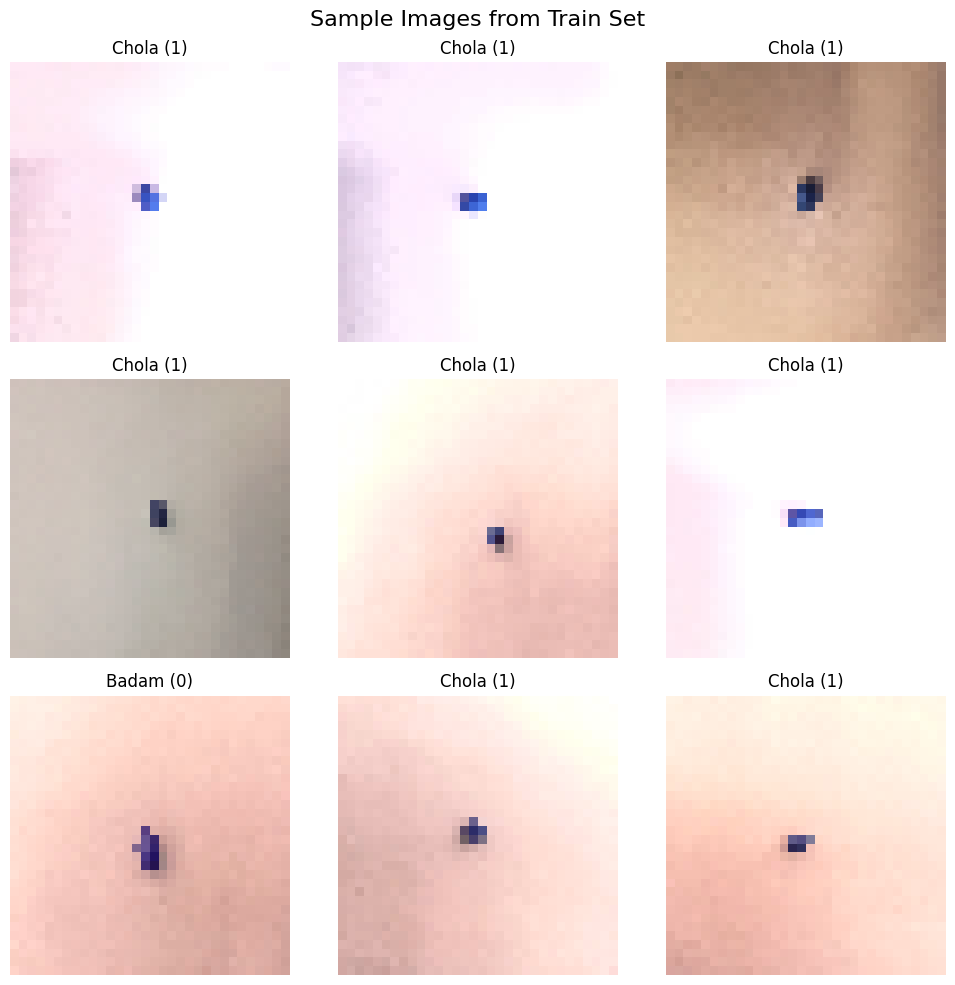

In [ ]:
# Define the number of images to plot
num_images = 9

# Get indices for random images from the train set
random_indices = np.random.choice(len(train_images), size=num_images, replace=False)

# Plot the images with labels
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[idx])
    if train_labels[idx] == 0:
        label_text = 'Nut (0)'
    else:
        label_text = 'Chicpea (1)'
    plt.title(label_text, fontsize=12)
    plt.axis('off')

plt.suptitle('Sample Images from Train Set', fontsize=16)
plt.tight_layout()
plt.show()


Label: Chickpea


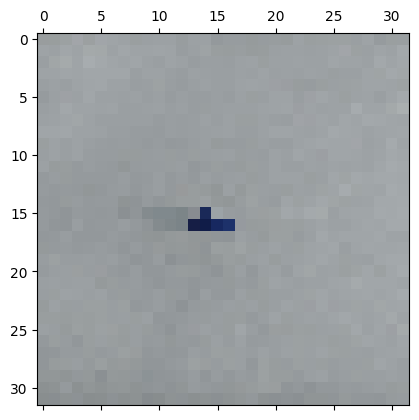

In [ ]:
idx = 2
print("Label:", 'Nut' if labels[idx]==0 else 'Chickpea')
plt.matshow(train_images[idx])

# CNN Model

In [ ]:
# Define input shape
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
inputs = Input(shape=input_shape)

# First Convolutional Layer
conv1 = Conv2D(64, (3, 3), activation='relu', padding = 'same')(inputs)
conv2 = Conv2D(64, (3, 3), activation='relu', padding = 'same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)

# Second Convolutional Layer
conv3 = Conv2D(128, (3, 3), activation='relu', padding = 'same')(pool1)
conv4 = Conv2D(128, (3, 3), activation='relu', padding = 'same')(conv3)
conv5 = Conv2D(128, (3, 3), activation='relu', padding = 'same')(conv4)
pool2 = MaxPooling2D((2, 2))(conv5)

# Flatten the output
flatten = Flatten()(pool2)

# Dense Layer
dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(dense1)

# Output layer with 1 neuron for binary classification
outputs = Dense(2, activation='softmax')(dense2)

# Create model
cnn_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
cnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Print the summary of the model
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                             

In [ ]:
start_time = time.time()
cnn_history = cnn_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=32, epochs=30)
end_time = time.time()
cnn_training_time = end_time - start_time

Epoch 1/30
35/35 [==============================] - 25s 654ms/step - loss: 0.6969 - accuracy: 0.4927 - val_loss: 0.6881 - val_accuracy: 0.7909
Epoch 2/30
35/35 [==============================] - 21s 588ms/step - loss: 0.5606 - accuracy: 0.7069 - val_loss: 0.4278 - val_accuracy: 0.9091
Epoch 3/30
35/35 [==============================] - 22s 626ms/step - loss: 0.3847 - accuracy: 0.8376 - val_loss: 0.7016 - val_accuracy: 0.7091
Epoch 4/30
35/35 [==============================] - 23s 669ms/step - loss: 0.2945 - accuracy: 0.8902 - val_loss: 0.2371 - val_accuracy: 0.9000
Epoch 5/30
35/35 [==============================] - 22s 642ms/step - loss: 0.1970 - accuracy: 0.9220 - val_loss: 0.6736 - val_accuracy: 0.7545
Epoch 6/30
35/35 [==============================] - 24s 698ms/step - loss: 0.1840 - accuracy: 0.9319 - val_loss: 0.2045 - val_accuracy: 0.9273
Epoch 7/30
35/35 [==============================] - 23s 655ms/step - loss: 0.1232 - accuracy: 0.9483 - val_loss: 0.4988 - val_accuracy: 0.8455

# Model history view CNN

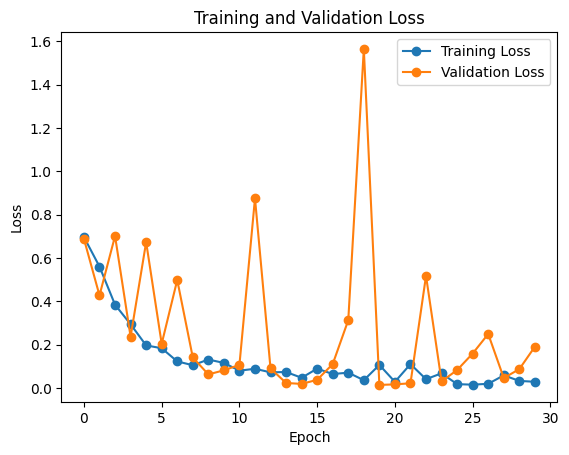

In [ ]:
plt.plot(cnn_history.history['loss'],  '-o',  label='Training Loss')
plt.plot(cnn_history.history['val_loss'], '-o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.savefig('CNN_Training_and_Validation_Loss.png')
plt.show()

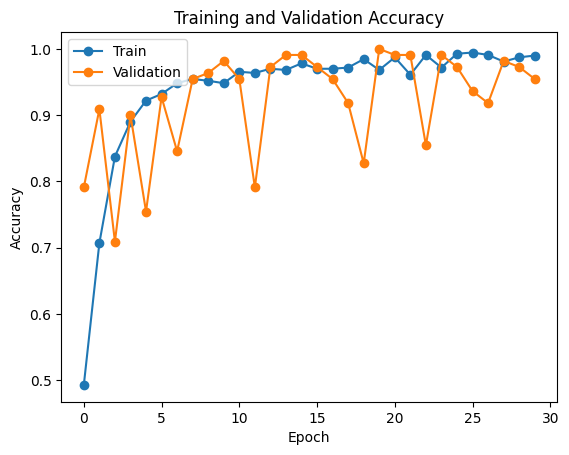

In [ ]:
plt.plot(cnn_history.history['accuracy'], '-o')
plt.plot(cnn_history.history['val_accuracy'], '-o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('CNN_Training_and_Validation_Accuracy.png')
plt.show()

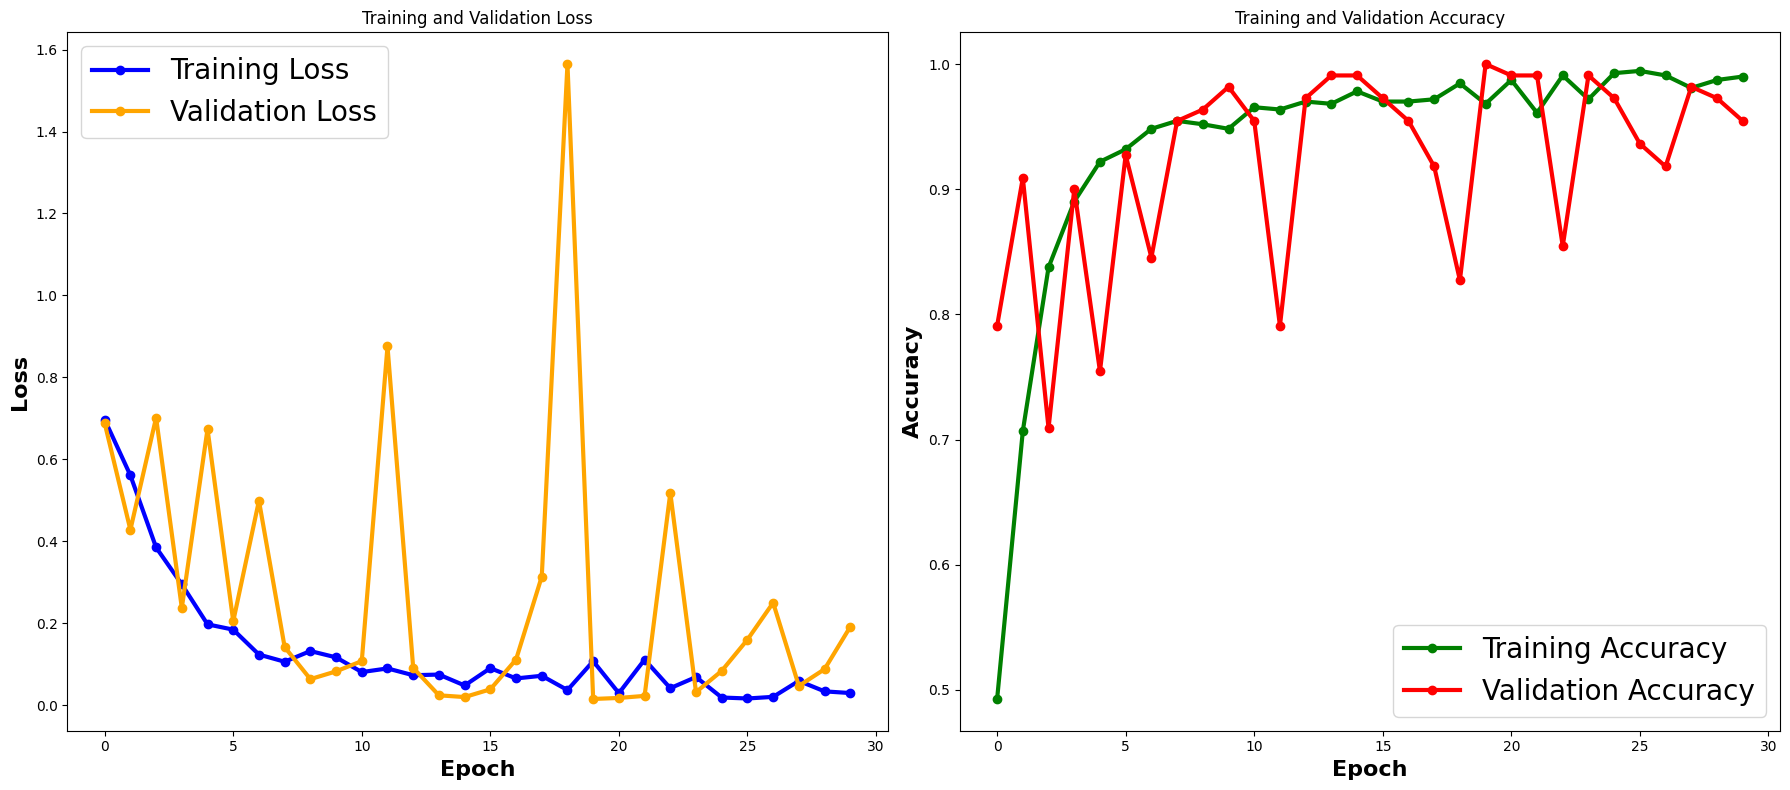

In [ ]:
plt.figure(figsize=(18, 8))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], '-o', label='Training Loss', color='blue', linewidth=3)
plt.plot(cnn_history.history['val_loss'], '-o', label='Validation Loss', color='orange', linewidth=3)
plt.xlabel('Epoch',fontsize=16, weight='bold')
plt.ylabel('Loss',fontsize=16, weight='bold')
plt.title('Training and Validation Loss')
plt.legend(fontsize=20)

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], '-o', label='Training Accuracy', color='green', linewidth=3)
plt.plot(cnn_history.history['val_accuracy'], '-o', label='Validation Accuracy', color='red', linewidth=3)
plt.xlabel('Epoch',fontsize=16, weight='bold')
plt.ylabel('Accuracy',fontsize=16, weight='bold')
plt.title('Training and Validation Accuracy')
plt.legend(fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/CNN_Training_and_Validation_Accuracy_and_Loss.png')
# Show the plot
plt.show()


# Testing

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.3f}%")

7/7 [==============================] - 1s 142ms/step - loss: 0.1170 - accuracy: 0.9682
Test Loss: 0.1169793
Test Accuracy: 96.818%


In [ ]:
y_pred = cnn_model.predict(test_images)
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred[0]

7/7 [==============================] - 1s 142ms/step


array([0.9534525 , 0.04654751], dtype=float32)

Actual: Nut


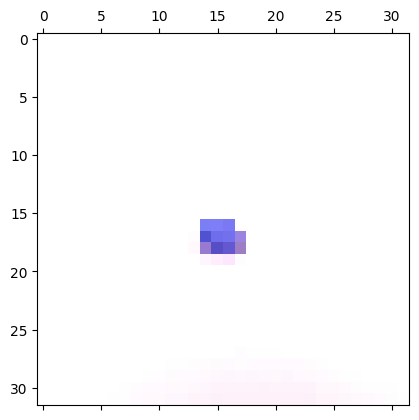

In [ ]:
idx = 0
print(f'Actual: {"Nut" if np.argmax(y_pred[idx]) == 0 else "Chickpea"}')
plt.matshow(test_images[idx])

#Confusion Matrix CNN

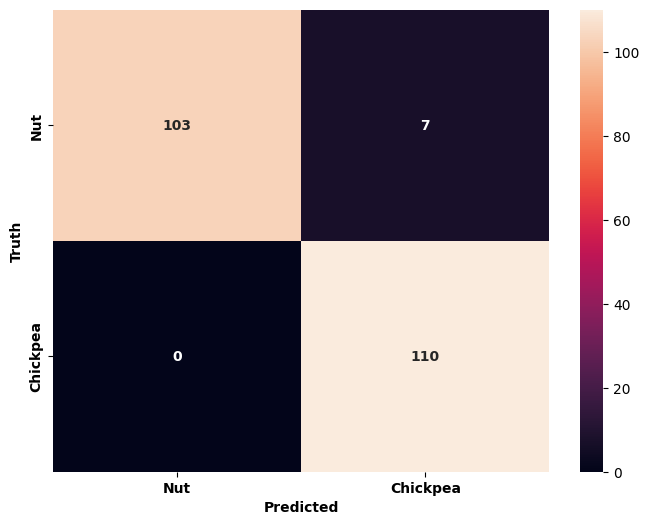

In [ ]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_labels)

plt.figure(figsize=(8, 6))
heatmap = sn.heatmap(cm, annot=True, fmt='d', annot_kws={"weight": "bold"})  # Bold numbers inside the heatmap

heatmap.set_xlabel('Predicted', weight='bold')
heatmap.set_ylabel('Truth', weight='bold')
heatmap.set_xticklabels(['Nut', 'Chickpea'], ha='center', weight='bold')
heatmap.set_yticklabels(['Nut', 'Chickpea'], va='center', weight='bold')
# plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/confusion_matrix_CNN.png')
plt.show()

### FCNN Model

In [ ]:
inputs = Input((IMAGE_WIDTH, IMAGE_HEIGHT,3), name='input')

x = Flatten()(inputs)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)
fcnn_model = Model(inputs, outputs, name='FCNN')

# Compile the model
fcnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print the model summary
fcnn_model.summary()


Model: "FCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                98336     
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 128)               32896  

In [ ]:
# Fit the model
start_time = time.time()
fcnn_history = fcnn_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=32, epochs=30)
end_time = time.time()
fcnn_training_time = end_time - start_time


Epoch 1/30
35/35 [==============================] - 2s 13ms/step - loss: 0.6945 - accuracy: 0.4973 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/30
35/35 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.4918 - val_loss: 0.6918 - val_accuracy: 0.5182
Epoch 3/30
35/35 [==============================] - 0s 7ms/step - loss: 0.6886 - accuracy: 0.5626 - val_loss: 0.6879 - val_accuracy: 0.6182
Epoch 4/30
35/35 [==============================] - 0s 7ms/step - loss: 0.6897 - accuracy: 0.5517 - val_loss: 0.6853 - val_accuracy: 0.7727
Epoch 5/30
35/35 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5318 - val_loss: 0.6903 - val_accuracy: 0.5273
Epoch 6/30
35/35 [==============================] - 0s 6ms/step - loss: 0.6830 - accuracy: 0.5917 - val_loss: 0.6844 - val_accuracy: 0.5091
Epoch 7/30
35/35 [==============================] - 0s 6ms/step - loss: 0.6674 - accuracy: 0.5998 - val_loss: 0.6662 - val_accuracy: 0.5091
Epoch 8/30
35/35 [=

#Plotting

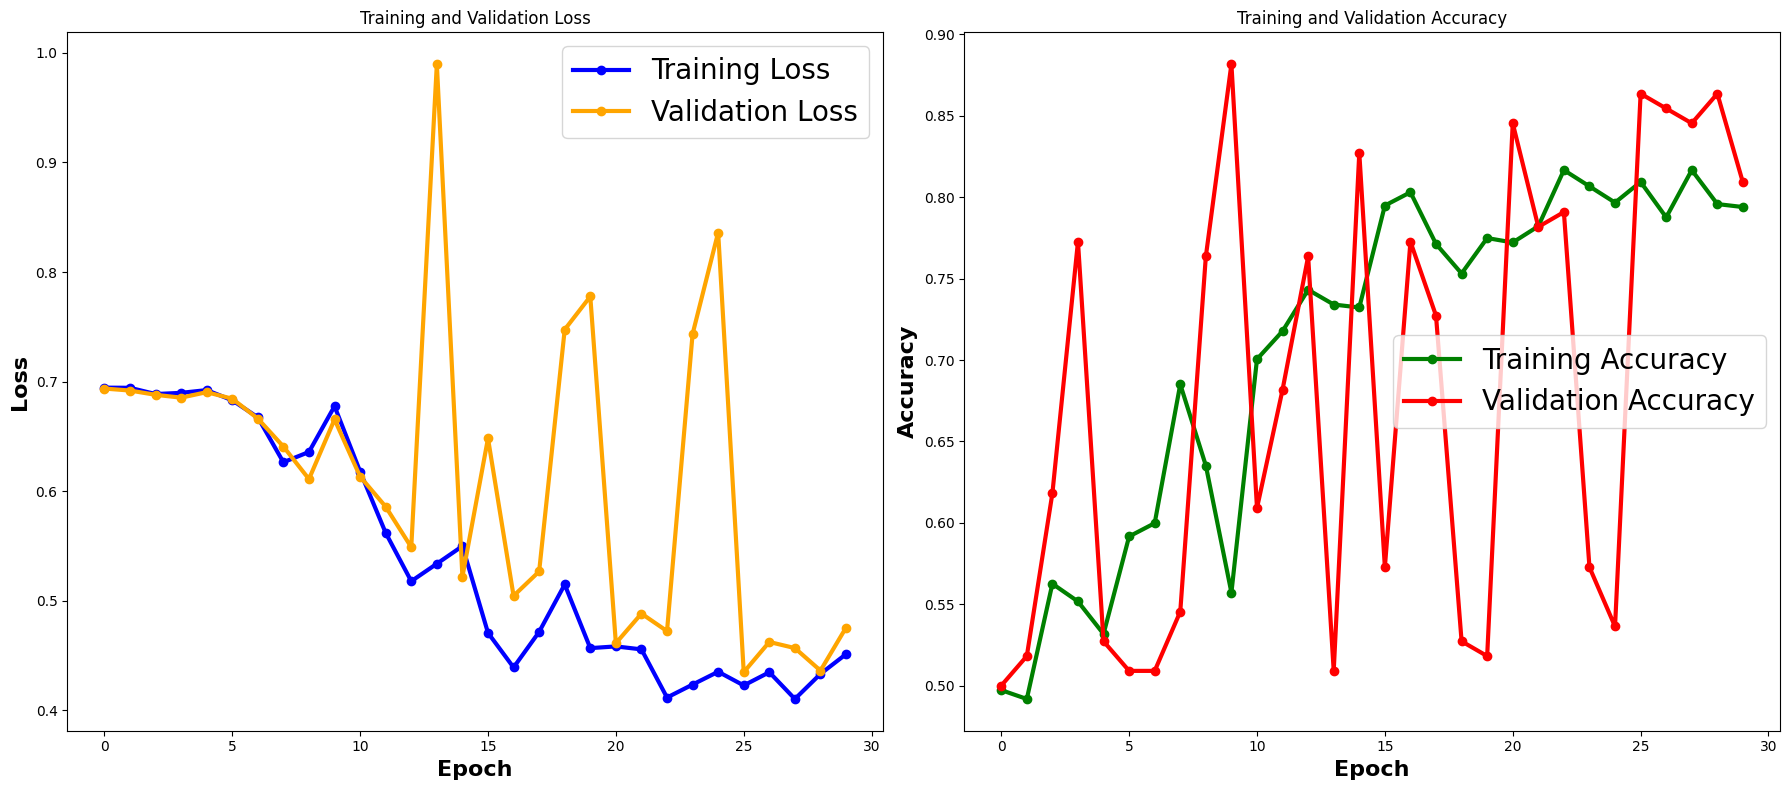

In [ ]:
plt.figure(figsize=(18, 8))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(fcnn_history.history['loss'], '-o', label='Training Loss', color='blue',linewidth=3)
plt.plot(fcnn_history.history['val_loss'], '-o', label='Validation Loss', color='orange',linewidth=3)
plt.xlabel('Epoch',fontsize=16, weight='bold')
plt.ylabel('Loss',fontsize=16, weight='bold')
plt.title('Training and Validation Loss')
plt.legend(fontsize=20)

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(fcnn_history.history['accuracy'], '-o', label='Training Accuracy', color='green',linewidth=3)
plt.plot(fcnn_history.history['val_accuracy'], '-o', label='Validation Accuracy', color='red',linewidth=3)
plt.xlabel('Epoch',fontsize=16, weight='bold')
plt.ylabel('Accuracy',fontsize=16, weight='bold')
plt.title('Training and Validation Accuracy')
plt.legend(fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/FCNN_Training_and_Validation_Accuracy_and_Loss.png')
# Show the plot
plt.show()


#Testing

In [ ]:
test_loss, test_accuracy = fcnn_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.3f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.4062 - accuracy: 0.8818
Test Loss: 0.4062412
Test Accuracy: 88.182%


In [ ]:
y_pred = fcnn_model.predict(test_images)
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred[0]

7/7 [==============================] - 0s 3ms/step


array([0.31854108, 0.6814589 ], dtype=float32)

Actual: Chickpea


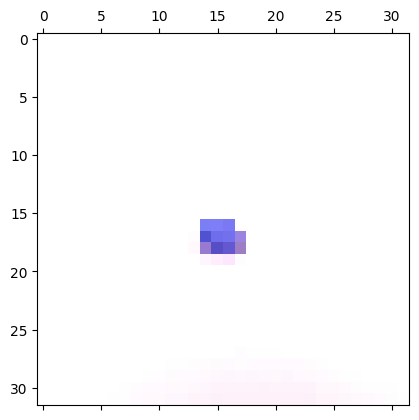

In [ ]:
idx = 0
print(f'Actual: {"Nut" if np.argmax(y_pred[idx]) == 0 else "Chickpea"}')
plt.matshow(test_images[idx])

#Confusion Matrix

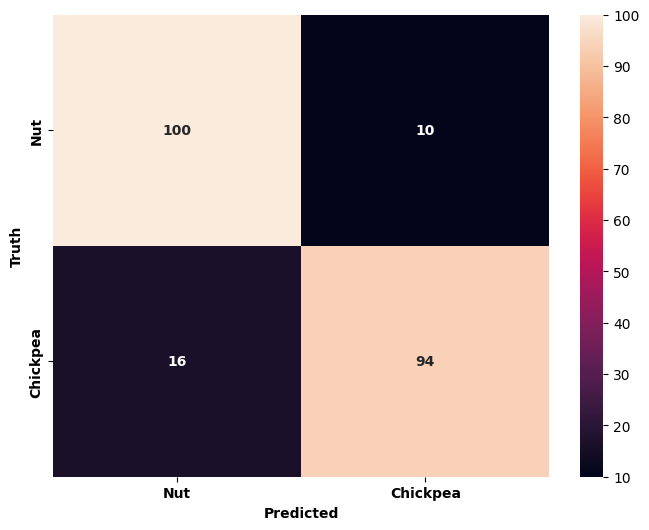

In [ ]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred_labels)

plt.figure(figsize=(8, 6))
heatmap = sn.heatmap(cm, annot=True, fmt='d', annot_kws={"weight": "bold"})  # Bold numbers inside the heatmap

heatmap.set_xlabel('Predicted', weight='bold')
heatmap.set_ylabel('Truth', weight='bold')
heatmap.set_xticklabels(['Nut', 'Chickpea'], ha='center', weight='bold')
heatmap.set_yticklabels(['Nut', 'Chickpea'], va='center', weight='bold')
# plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/confusion_matrix_FCNN.png')
plt.show()

### Model Performance Comparison

In [ ]:
cnn_val_loss = cnn_history.history['val_loss']
cnn_val_accuracy = cnn_history.history['val_accuracy']
fcnn_val_loss = fcnn_history.history['val_loss']
fcnn_val_accuracy = fcnn_history.history['val_accuracy']

4/4 [==============================] - 0s 2ms/step


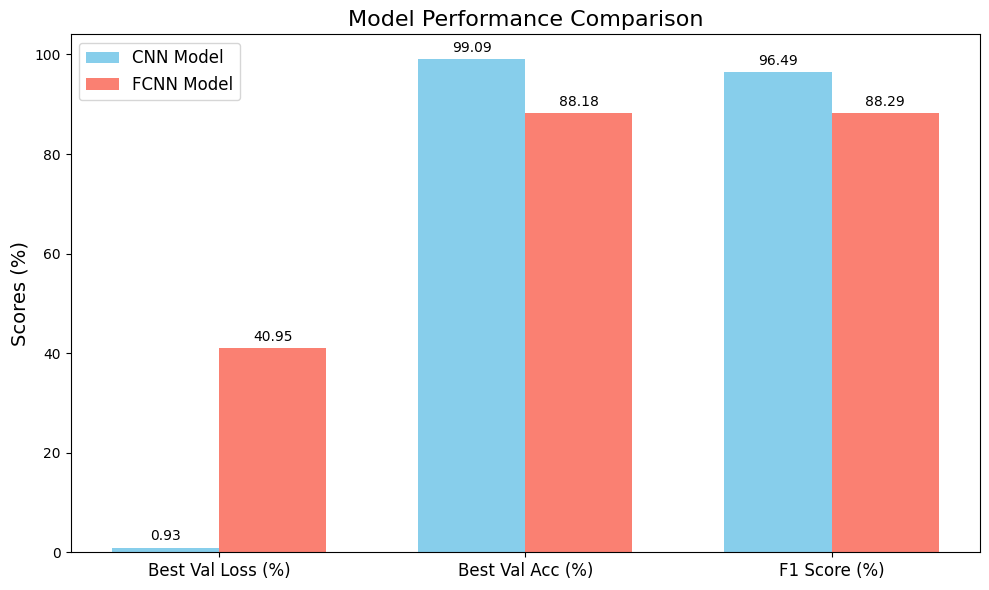

In [ ]:
# Calculate F1 scores for both models
cnn_predictions = np.argmax(cnn_model.predict(val_images), axis=-1)
fcnn_predictions = np.argmax(fcnn_model.predict(val_images), axis=-1)
cnn_f1 = f1_score(val_labels, cnn_predictions)
fcnn_f1 = f1_score(val_labels, fcnn_predictions)

# Get best validation loss, accuracy, and F1 scores
best_cnn_val_loss = min(cnn_val_loss)
best_cnn_val_acc = max(cnn_val_accuracy)
best_fcnn_val_loss = min(fcnn_val_loss)
best_fcnn_val_acc = max(fcnn_val_accuracy)

# Convert to percentages
best_cnn_val_loss_percent = best_cnn_val_loss * 100
best_cnn_val_acc_percent = best_cnn_val_acc * 100
best_fcnn_val_loss_percent = best_fcnn_val_loss * 100
best_fcnn_val_acc_percent = best_fcnn_val_acc * 100
cnn_f1_percent = cnn_f1 * 100
fcnn_f1_percent = fcnn_f1 * 100

# Create bar chart
labels = ['Best Val Loss (%)', 'Best Val Acc (%)', 'F1 Score (%)']
cnn_values = [best_cnn_val_loss_percent, best_cnn_val_acc_percent, cnn_f1_percent]
fcnn_values = [best_fcnn_val_loss_percent, best_fcnn_val_acc_percent, fcnn_f1_percent]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, cnn_values, width, label='CNN Model', color='skyblue')
rects2 = ax.bar(x + width/2, fcnn_values, width, label='FCNN Model', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores (%)', fontsize=14)
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(prop={'size': 12})

# Add values on top of bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/model_performance_comparison.png')
plt.show()

#Training time comparison

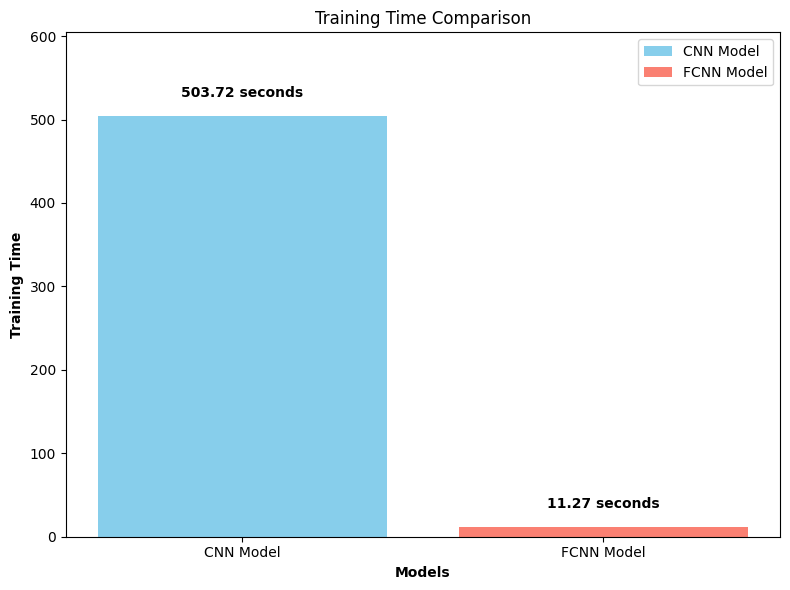

In [ ]:
# Plot the training time comparison
models = ['CNN Model', 'FCNN Model']
training_times = [cnn_training_time, fcnn_training_time]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, training_times, color=['skyblue', 'salmon'])
plt.xlabel('Models', weight='bold')
plt.ylabel('Training Time', weight='bold')
plt.title('Training Time Comparison')
plt.xticks()
plt.ylim(0, max(training_times) * 1.2)  # Set y-axis limit

# Add values on top of bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,  # Adjust the distance here (20)
             f'{training_times[i]:.2f} seconds',
             ha='center', va='bottom', weight='bold')

# Add legend
plt.legend(bars, models, loc='upper right')

plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Classifier Dataset/Images Save/training_time_comparison.png')
plt.show()
